In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
df = pd.read_csv('/content/data.csv')

In [11]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
454,911202,B,12.620,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,...,22.15,91.62,633.5,0.1225,0.1517,0.1887,0.09851,0.3270,0.07330,NaN
536,91979701,M,14.270,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,...,34.27,104.30,728.3,0.1380,0.2733,0.4234,0.13620,0.2698,0.08351,NaN
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.29100,0.4055,0.09789,NaN
195,875878,B,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,...,22.00,90.81,600.6,0.1097,0.1506,0.1764,0.08235,0.3024,0.06949,NaN
525,91805,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.01510,...,18.45,63.30,275.6,0.1641,0.2235,0.1754,0.08512,0.2983,0.10490,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [15]:
df2 = df[['diagnosis']].rename(columns={'diagnosis': 'target'})
df2.sample(5)

,target
339,M
346,B
54,M
78,M
177,M


([<matplotlib.patches.Wedge at 0x781856186ed0>,
 [Text(-0.4286547583668386, 1.0130424957174637, 'B'),
  Text(0.4286549676938969, -1.0130424071436221, 'M')],
 [Text(-0.23381168638191194, 0.5525686340277074, '62.74%'),
  Text(0.23381180056030737, -0.5525685857147029, '37.26%')])

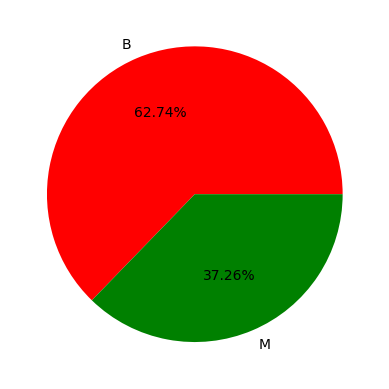

In [17]:
import matplotlib.pyplot as plt
class_counts=df2["target"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=['red', 'green'])

In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df2['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = model.predict(X_test)
print(y_pred[:10])

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']


In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 94.15%
